# Keras tutorial

## About loss


## Import packages

In [1]:
import numpy as np

## Read file (.csv)

In [2]:
''' Read input files '''
my_data = np.genfromtxt('pkgo_city66_class5_v1.csv', delimiter=',',skip_header=1)
my_data

array([[ 4.75103051e-03, -6.17821413e-01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 7.32567623e-02, -7.03223092e-01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.16701071e-03, -6.12492068e-01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 5.70891235e-02, -7.17853334e-01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.92581084e-02, -5.76852227e-01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  3.00000000e+00],
       [ 6.42996994e-03, -6.13366496e-01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  3.00000000e+00]])

In [3]:
''' The first column to the 199th column is used as input features '''
X_train = my_data[:,0:200]
X_train = X_train.astype('float32')

''' The 200-th column is the answer '''
y_train = my_data[:,200]
y_train = y_train.astype('int')

## The target looks like that ...

In [4]:
y_train

array([1, 0, 1, ..., 1, 3, 3])

##  Convert to one-hot encoding

In [5]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train,5)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


##  Shuffle training data

In [6]:
from sklearn.utils import shuffle
X_train,Y_train = shuffle(X_train,Y_train,random_state=100)

## Import keras to build a DL model

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

## Building a model whose loss function is categorical_crossentropy

In [8]:
model_ce = Sequential()
model_ce.add(Dense(128, input_dim=200))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(256))
model_ce.add(Activation('sigmoid'))
model_ce.add(Dense(5))
model_ce.add(Activation('softmax'))

## Building a model whose loss function is mean_squared_error

In [9]:
model_mse = Sequential()
model_mse.add(Dense(128, input_dim=200))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(256))
model_mse.add(Activation('sigmoid'))
model_mse.add(Dense(5))
model_mse.add(Activation('softmax'))

## Set up the optimizer

In [10]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
sgd = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

## Compile model with specified loss and optimizer

### loss with crossentropy

In [11]:
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])

### loss with mean_squared_error

In [12]:
model_mse.compile(loss= 'mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])

## set the size of mini-batch and number of epochs

In [13]:
batch_size = 16
epochs = 30

## Fit models and use validation_split=0.1

In [14]:
history_ce = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [15]:
history_mse = model_mse.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

## Access the loss and accuracy in every epoch

In [16]:
loss_ce	= history_ce.history.get('loss')
acc_ce 	= history_ce.history.get('acc')
loss_mse= history_mse.history.get('loss')
acc_mse = history_mse.history.get('acc')

## Visualization

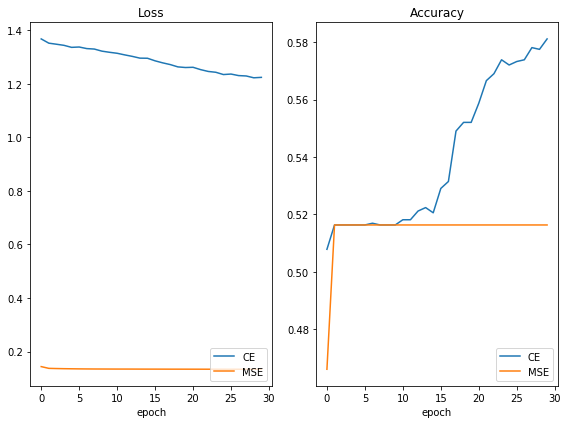

In [17]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_ce)), loss_ce,label='CE')
plt.plot(range(len(loss_mse)), loss_mse,label='MSE')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(range(len(acc_ce)), acc_ce,label='CE')
plt.plot(range(len(acc_mse)), acc_mse,label='MSE')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('01_lossFuncSelection.png',dpi=300,format='png')
plt.show()

## About learning rate (fit loss function)

In [18]:
sgd1 = SGD(lr=0.1,momentum=0.0,decay=0.0,nesterov=False)

In [19]:
sgd2 = SGD(lr=0.01,momentum=0.0,decay=0.0,nesterov=False)

In [20]:
sgd3 = SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False)

## Compile

* **sgd ＝ 0.1**

In [21]:
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd1,
				metrics=['accuracy'])

In [22]:
history_ce1= model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [23]:
loss_small = history_ce1.history.get('loss')
acc_small = history_ce1.history.get('acc')

 * **sgd ＝ 0.01**

In [24]:
model_ce.compile(loss='categorical_crossentropy',
				optimizer=sgd2,
				metrics=['accuracy'])

In [25]:
history_ce2 = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [26]:
loss_median = history_ce2.history.get('loss')
acc_median = history_ce2.history.get('acc')

 * **sgd ＝ 0.001**

In [27]:
model_ce.compile(loss= 'categorical_crossentropy',
              optimizer=sgd3,
              metrics=['accuracy'])

In [28]:
history_ce3 = model_ce.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

In [29]:
loss_large = history_ce3.history.get('loss')
acc_large = history_ce3.history.get('acc')

## Visualization

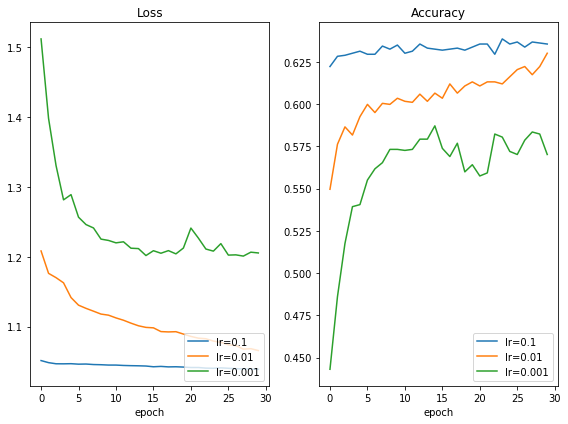

In [30]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_large)), loss_large,label='lr=0.1')
plt.plot(range(len(loss_median)), loss_median,label='lr=0.01')
plt.plot(range(len(loss_small)), loss_small,label='lr=0.001')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.subplot(122)
plt.plot(range(len(acc_large)), acc_large,label='lr=0.1')
plt.plot(range(len(acc_median)), acc_median,label='lr=0.01')
plt.plot(range(len(acc_small)), acc_small,label='lr=0.001')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## About Activation function (fit loss function, learning rate)

## RELU

In [31]:
model_sp = Sequential()
model_sp.add(Dense(128, input_dim=200))
model_sp.add(Activation('relu'))
model_sp.add(Dense(256))
model_sp.add(Activation('relu'))
model_sp.add(Dense(5))
model_sp.add(Activation('softmax'))


In [32]:
model_sp.compile(loss= 'categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history_sp = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_sp = history_sp.history.get('loss')
acc_sp = history_sp.history.get('acc')

## Sigmoid

In [33]:
model_bm = Sequential()
model_bm.add(Dense(128, input_dim=200))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(256))
model_bm.add(Activation('sigmoid'))
model_bm.add(Dense(5))
model_bm.add(Activation('softmax'))

In [34]:
model_bm.compile(loss='categorical_crossentropy',
				optimizer=sgd,
				metrics=['accuracy'])
history_bm = model_bm.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)
loss_bm	= history_bm.history.get('loss')
acc_bm 	= history_bm.history.get('acc')

## Visualization

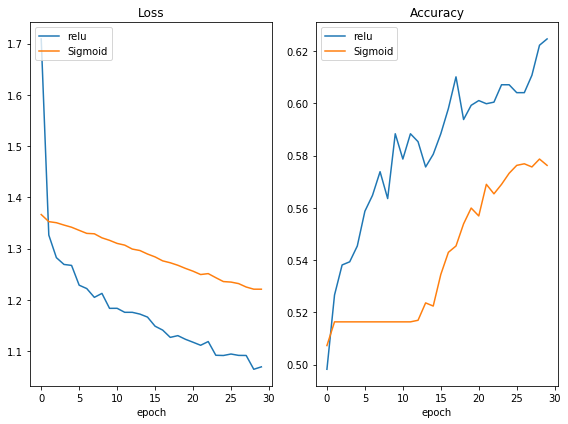

In [35]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_sp)),loss_sp,label='relu')
plt.plot(range(len(loss_bm)),loss_bm,label='Sigmoid')
plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_sp)),acc_sp,label='relu')
plt.plot(range(len(acc_bm)),acc_bm,label='Sigmoid')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## About optimizer

In [49]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

## Adam

In [43]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=Adam(lr=0.01),
              		metrics=['accuracy'])
history_adam = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_adam= history_adam.history.get('loss')
acc_adam = history_adam.history.get('acc')

## SGD


In [44]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=SGD(lr=0.01),
              		metrics=['accuracy'])
history_sgd = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_sgd = history_sgd.history.get('loss')
acc_sgd = history_sgd.history.get('acc')

## RMSprop

In [45]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=RMSprop(lr=0.01),
              		metrics=['accuracy'])
history_rms = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_rms = history_rms.history.get('loss')
acc_rms = history_rms.history.get('acc')

## Adagrad
---
![](https://i.imgur.com/Vp0HPn0.png)

In [46]:
model_sp.compile(loss= 'categorical_crossentropy',
              		optimizer=Adagrad(lr=0.01),
              		metrics=['accuracy'])
history_ada = model_sp.fit(X_train, Y_train,
							batch_size=batch_size,
							epochs=epochs,
							verbose=0,
							shuffle=True,
                    		validation_split=0.1)

loss_ada = history_ada.history.get('loss')
acc_ada = history_ada.history.get('acc')

## Visualization

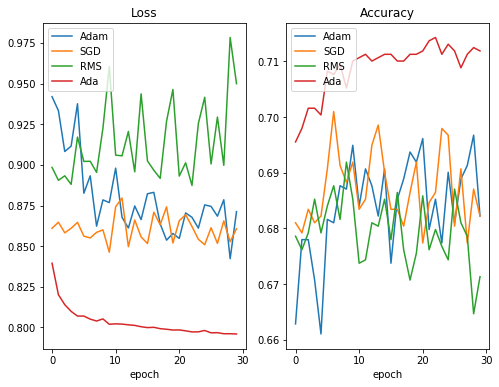

In [47]:
import matplotlib.pyplot as plt
plt.figure(0,figsize=(8,6))
plt.subplot(121)
plt.plot(range(len(loss_adam)), loss_adam,label='Adam')
plt.plot(range(len(loss_sgd)), loss_sgd,label='SGD')
plt.plot(range(len(loss_rms)), loss_rms,label='RMS')
plt.plot(range(len(loss_ada)), loss_ada,label='Ada')

plt.title('Loss')
plt.xlabel("epoch")
plt.legend(loc='upper left')
plt.subplot(122)
plt.plot(range(len(acc_adam)), acc_adam,label='Adam')
plt.plot(range(len(acc_sgd)), acc_sgd,label='SGD')
plt.plot(range(len(acc_rms)), acc_rms,label='RMS')
plt.plot(range(len(acc_ada)), acc_ada,label='Ada')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.xlabel("epoch")
plt.show()